In [1]:
# qiskit_superposition
#Various state can be expressed at the same time by creating superposition.
#In terms of n bits binary number, we can easily make n states by operating Hadamard to all the qubits.  

#What if we want to make n-1 states by n qubits?
#That is no so simple, so my goal is to make an algorithm which enables us to make any kinds of superposition.

import numpy as np
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit import IBMQ, execute, Aer
from qiskit.tools.visualization import plot_histogram
import math

{'1100': 67, '1011': 54, '1001': 76, '0011': 56, '0100': 69, '0000': 66, '0101': 70, '0111': 48, '1000': 58, '0001': 66, '0010': 63, '1110': 64, '1111': 75, '1101': 60, '0110': 68, '1010': 64}


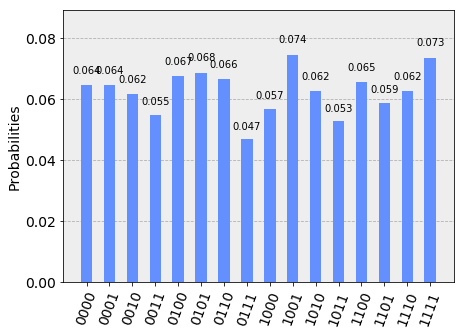

In [2]:
#4 qubits superposition 16 states
q = QuantumRegister(4, 'q')
c = ClassicalRegister(4, 'c')
qc = QuantumCircuit(q, c)

qc.h(q)

qc.measure(q, c)

r = execute(qc, Aer.get_backend('qasm_simulator')).result()
rc = r.get_counts()
print(rc)
plot_histogram(rc)

In [7]:
def ry_arc(qubit, num):
    theta = 2 * np.arccos(1 / np.sqrt(num))
    qc.ry(theta, q[qubit])

{'0001': 123, '1011': 115, '0000': 128, '1111': 113, '1001': 102, '1101': 118, '0011': 111, '0101': 118, '0111': 96}


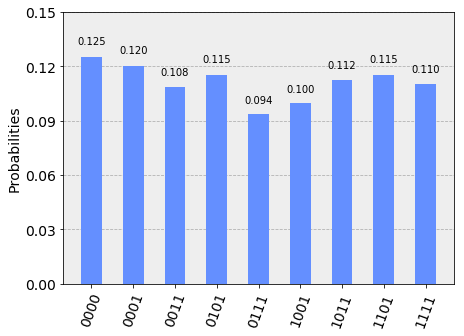

In [17]:
#0000, 0001, 0011, 0101, 0111, 1001, 1011, 1101, 1111
q = QuantumRegister(4, 'q')
c = ClassicalRegister(4, 'c')
qc = QuantumCircuit(q, c)

ry_arc(0, 9)
qc.ch(q[0], q[1])
qc.ch(q[0], q[2])
qc.ch(q[0], q[3])


qc.measure(q, c)

r = execute(qc, Aer.get_backend('qasm_simulator')).result()
rc = r.get_counts()
print(rc)
plot_histogram(rc)

If we want to make 2^n + 1 states (e.g 33 states), we can easily make that superposition.
There is 2 steps,(2^n + 1: the number of superposition states)
    1 Make the probability amplitude of first qubit's |0> 1/√(2^n + 1) by operating ry gates
    2 Operate ch gate for n times. Control qubit must be a first qubit.
    
In this way, we can make 5, 9, 17, 33, ...states superpositon.

In [22]:
# generalize
def two_pwr_plus_1(quNum):
    ry_arc(0, 1 + 2 ** (quNum - 1)) # step 1
    for i in range(quNum - 1):
        qc.ch(q[0], q[i + 1])

{'10001': 55, '11011': 62, '01011': 57, '11101': 49, '11001': 67, '01001': 58, '00011': 60, '00000': 66, '00101': 63, '00111': 68, '00001': 58, '10101': 60, '10111': 64, '10011': 66, '01111': 48, '01101': 63, '11111': 60}


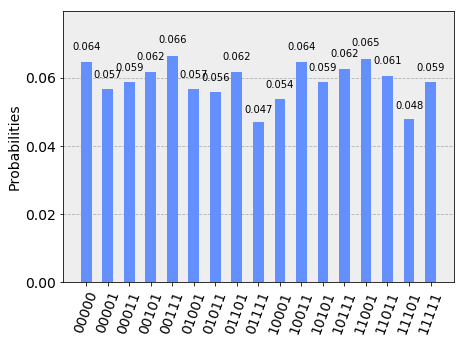

In [34]:
#test - 17 states
quNum = 5
q = QuantumRegister(quNum, 'q')
c = ClassicalRegister(quNum, 'c')
qc = QuantumCircuit(q, c)

two_pwr_plus_1(quNum)

qc.measure(q, c)

r = execute(qc, Aer.get_backend('qasm_simulator')).result()
rc = r.get_counts()
print(rc)
plot_histogram(rc)

In [38]:
mem = 0
for i in range(100):
    quNum = 5
    q = QuantumRegister(quNum, 'q')
    c = ClassicalRegister(quNum, 'c')
    qc = QuantumCircuit(q, c)

    two_pwr_plus_1(quNum)

    qc.measure(q, c)

    r = execute(qc, Aer.get_backend('qasm_simulator')).result()
    rc = r.get_counts()
    mem += rc['00101']
print('Average count is' + str(mem / 100))
print('Ideal percentage is ' + str(100 / 17) + '% | In this run, ' + str(mem/1024) + '%')

Average count is59.54
Ideal percentage is 5.882352941176471% | In this run, 5.814453125%
